# Naive Bayes (Classification) using Builtin Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y, test_size = 0.2)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [13]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2,
       1, 2, 0, 0, 1, 1, 0, 2])

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score
cm = confusion_matrix(Y_test, y_pred)
# Calculate MSE, RMSE, and R2 Score
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f'\nMean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'R2 Score: {r2:.4f}')
cm


Mean Squared Error (MSE): 0.0333
Root Mean Squared Error (RMSE): 0.1826
R2 Score: 0.9543


array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  1, 11]], dtype=int64)

In [17]:
df = pd.DataFrame({"Actual Values":Y_test, "Predicted Values":y_pred})
df

,Actual Values,Predicted Values
0,0,0
1,1,1
2,2,2
3,0,0
4,2,2
5,2,2
6,0,0
7,1,1
8,2,2
9,2,2


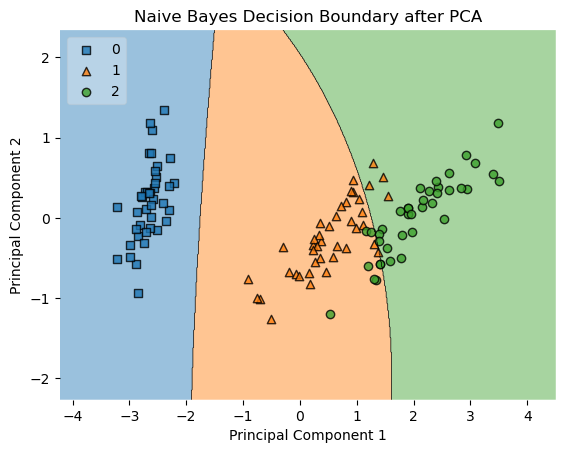

In [19]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
# Reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)

# Split the transformed data
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train and plot the decision boundary
nbc = GaussianNB()
nbc.fit(X_train, Y_train)
plot_decision_regions(X_train, Y_train, clf=nbc, legend=2)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Naive Bayes Decision Boundary after PCA")
plt.show()